In [2]:
import pandas as pd
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [5]:
df = pd.read_csv(r'../data/seoul_cycle2212.csv',encoding = 'ansi')
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-44695,2022-12-01 0:00,1933,개봉푸르지오아파트 상가,0,2022-12-01 0:00,1933,개봉푸르지오아파트 상가,0,0,0.00,\N,M,내국인,ST-678,ST-678
1,SPB-31562,2022-12-01 0:00,3007,MBC 앞,0,2022-12-01 0:00,3007,MBC 앞,0,0,111.20,1995,F,내국인,ST-2165,ST-2165
2,SPB-56324,2022-12-01 0:01,4468,가락1동주민센터,0,2022-12-01 0:01,4468,가락1동주민센터,0,0,0.00,1994,M,내국인,ST-2583,ST-2583
3,SPB-30175,2022-12-01 0:03,652,답십리 래미안엘파인아파트 입구,0,2022-12-01 0:03,652,답십리 래미안엘파인아파트 입구,0,0,0.00,1981,M,내국인,ST-1447,ST-1447
4,SPB-37639,2022-12-01 0:00,1047,강동 한신휴플러스,0,2022-12-01 0:03,1075,천동초교 삼거리,0,3,492.34,1989,M,내국인,ST-1369,ST-1836


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   자전거번호     1048575 non-null  object 
 1   대여일시      1048575 non-null  object 
 2   대여 대여소번호  1048575 non-null  int64  
 3   대여 대여소명   1048575 non-null  object 
 4   대여거치대     1048575 non-null  int64  
 5   반납일시      1048575 non-null  object 
 6   반납대여소번호   1048575 non-null  object 
 7   반납대여소명    1048575 non-null  object 
 8   반납거치대     1048575 non-null  object 
 9   이용시간(분)   1048575 non-null  int64  
 10  이용거리(M)   1048575 non-null  float64
 11  생년        1048575 non-null  object 
 12  성별        1014450 non-null  object 
 13  이용자종류     1048575 non-null  object 
 14  대여대여소ID   1048575 non-null  object 
 15  반납대여소ID   1048575 non-null  object 
dtypes: float64(1), int64(3), object(12)
memory usage: 128.0+ MB


In [7]:
df.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '생년', '성별', '이용자종류', '대여대여소ID',
       '반납대여소ID'],
      dtype='object')

In [97]:
df['대여 대여소명'].unique()

array(['개봉푸르지오아파트 상가', 'MBC 앞', '가락1동주민센터', ..., '매봉역 1번출구', '삼양동주민센터 앞',
       '당산역11번출구'], dtype=object)

In [11]:
# 가장많이 대여한 대여소 
data = df[['대여 대여소번호','대여 대여소명']]
data_vc = data.value_counts()
data_vc

대여 대여소번호  대여 대여소명          
2715      마곡나루역 2번 출구          4880
2701      마곡나루역 5번출구 뒤편        3640
1210      롯데월드타워(잠실역2번출구 쪽)    3064
1153      발산역 1번, 9번 인근 대여소    2760
2728      마곡나루역 3번 출구          2705
                               ... 
3538      서울숲 IT캐슬                5
4918      매봉역 1번출구                3
4322      서울추모공원 입구               3
11        위트콤공장                   2
5862      당산역11번출구                1
Length: 2687, dtype: int64

In [13]:
df2 = pd.read_csv('../data/공공자전거대여소정보수정2212.csv', encoding='ansi', )
df2.columns =['대여 대여소번호','대여 대여소명','자치구','상세주소','위도','경도','설치시기','거치대수1','거치대수2','운영방식']
df2.head(20)

,대여 대여소번호,대여 대여소명,자치구,상세주소,위도,경도,설치시기,거치대수1,거치대수2,운영방식
0,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,NaN,11.0,QR
1,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 새문안로 82 광화문S타워 앞,37.569969,126.973938,2015-10-07,NaN,31.0,QR
2,305,종로구청 옆,종로구,서울특별시 종로구 새문안로 102-2 가로판매대,37.569962,126.976158,2015-10-07,NaN,13.0,QR
3,307,서울역사박물관 앞,종로구,서울특별시 종로구 삼청로 30 국립현대미술관 서울관,37.579708,126.980858,2015-10-07,NaN,10.0,QR
4,308,광화문 S타워 앞,종로구,서울특별시 종로구 종로 47 종각역 1번출구 앞,37.570396,126.981789,2015-10-07,NaN,8.0,QR
5,309,광화문역 6번출구 옆 B,종로구,서울특별시 종로구 율곡로 지하62 안국역 5번출구 앞,37.576241,126.986160,2015-10-07,19.0,NaN,LCD
6,314,국립현대미술관,종로구,서울특별시 종로구 삼일대로 428 낙원상가 옆,37.573357,126.987465,2015-10-07,NaN,10.0,QR
7,316,종각역 1번출구 앞,종로구,서울특별시 종로구 종로 99 탑골공원 앞,37.570396,126.988190,2015-10-07,NaN,11.0,QR
8,326,안국역 5번출구 앞,종로구,서울특별시 종로구 청계천로 93 파고다타워,37.568485,126.987885,2015-10-07,8.0,NaN,LCD
9,327,낙원상가 옆,종로구,서울특별시 종로구 종로 지하129 종로3가역 2번출구 뒤,37.570599,126.991791,2015-10-07,NaN,10.0,QR


In [14]:
# 자치구 개수확인
df2['자치구'].unique().shape

(25,)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여 대여소번호  2715 non-null   int64  
 1   대여 대여소명   2715 non-null   object 
 2   자치구       2715 non-null   object 
 3   상세주소      2715 non-null   object 
 4   위도        2715 non-null   float64
 5   경도        2715 non-null   float64
 6   설치시기      2715 non-null   object 
 7   거치대수1     1199 non-null   float64
 8   거치대수2     1517 non-null   float64
 9   운영방식      2715 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 212.2+ KB


In [17]:
# 대여소 고유번호를 이용해 자치구 삽입
dataset1 = df2[['대여 대여소번호','자치구']]
dataset1

,대여 대여소번호,자치구
0,302,종로구
1,303,종로구
2,305,종로구
3,307,종로구
4,308,종로구
...,...,...
2710,3691,강동구
2711,3692,강동구
2712,3694,강동구
2713,3698,강동구


In [18]:
# 기본데이터에 대여소번호를 이용하여 자치구합침
df3 = pd.merge(df, dataset1, on='대여 대여소번호')

In [19]:
df3

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자치구
0,SPB-44695,2022-12-01 0:00,1933,개봉푸르지오아파트 상가,0,2022-12-01 0:00,1933,개봉푸르지오아파트 상가,0,0,0.00,\N,M,내국인,ST-678,ST-678,구로구
1,SPB-59213,2022-12-01 0:01,1933,개봉푸르지오아파트 상가,0,2022-12-01 0:10,1931,개봉역2번출구 A,0,9,1410.00,\N,M,내국인,ST-678,ST-920,구로구
2,SPB-63198,2022-12-01 0:30,1933,개봉푸르지오아파트 상가,0,2022-12-01 0:34,743,현대6차아파트 101동 옆,0,4,930.00,1990,\N,내국인,ST-678,ST-1014,구로구
3,SPB-62998,2022-12-01 3:14,1933,개봉푸르지오아파트 상가,0,2022-12-01 3:20,743,현대6차아파트 101동 옆,0,5,930.00,1959,M,내국인,ST-678,ST-1014,구로구
4,SPB-44695,2022-12-01 4:12,1933,개봉푸르지오아파트 상가,0,2022-12-01 4:13,1933,개봉푸르지오아파트 상가,0,0,0.00,1969,M,내국인,ST-678,ST-678,구로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045228,SPB-58002,2022-12-13 21:33,3724,삼양동주민센터 앞,0,2022-12-13 21:47,3707,드래곤타워 앞,0,13,2381.05,1967,F,내국인,ST-3184,ST-2459,도봉구
1045229,SPB-32320,2022-12-14 17:46,3724,삼양동주민센터 앞,0,2022-12-14 17:54,1574,송중초등학교 옆,0,8,1312.06,2004,\N,내국인,ST-3184,ST-2405,도봉구
1045230,SPB-31747,2022-12-14 18:43,3724,삼양동주민센터 앞,0,2022-12-14 18:58,1530,광산사거리,0,15,2400.74,\N,M,내국인,ST-3184,ST-1104,도봉구
1045231,SPB-61191,2022-12-14 19:13,3724,삼양동주민센터 앞,0,2022-12-14 19:38,1535,효성인텔리안 앞,0,25,1960.00,1999,F,내국인,ST-3184,ST-1109,도봉구


In [40]:
# 대여위치의 자치구 카운팅 
data1 = df3['자치구'].value_counts()
data1

강서구     131677
송파구      96474
영등포구     85088
양천구      66570
노원구      61869
마포구      49526
광진구      47853
강동구      47426
구로구      41399
성동구      38045
동대문구     37727
종로구      37259
중랑구      29957
서초구      29685
강남구      29122
은평구      26889
중구       26593
관악구      25702
성북구      24883
도봉구      20520
서대문구     20386
동작구      19359
금천구      18410
용산구      18234
강북구      14580
Name: 자치구, dtype: int64

In [50]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

<AxesSubplot:>

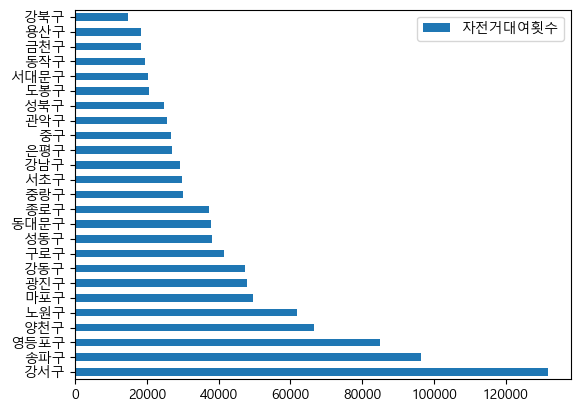

In [54]:
# 자치구별 대여횟수 시각화 
df4 =pd.DataFrame(data1)
df4.columns=['자전거대여횟수']
df4.plot.barh()

In [100]:
dataset1

,대여 대여소번호,자치구
0,302,종로구
1,303,종로구
2,305,종로구
3,307,종로구
4,308,종로구
...,...,...
2710,3691,강동구
2711,3692,강동구
2712,3694,강동구
2713,3698,강동구


In [109]:
import seaborn as sns

In [246]:
# 자치구 별 대여소갯수
a_area =pd.DataFrame(dataset1['자치구'].value_counts()) 
a_area.columns=['대여소 개수']
a_area.index.names = ["자치구"]
a_area['자치구'] = a_area.index
# a_area = a_area.style.hide_index()
a_area

,대여소 개수,자치구
자치구,,
송파구,214,송파구
강서구,188,강서구
강남구,169,강남구
영등포구,152,영등포구
서초구,145,서초구
노원구,135,노원구
마포구,122,마포구
강동구,121,강동구
양천구,109,양천구


<Figure size 1600x700 with 0 Axes>

<AxesSubplot:xlabel='자치구', ylabel='대여소 개수'>

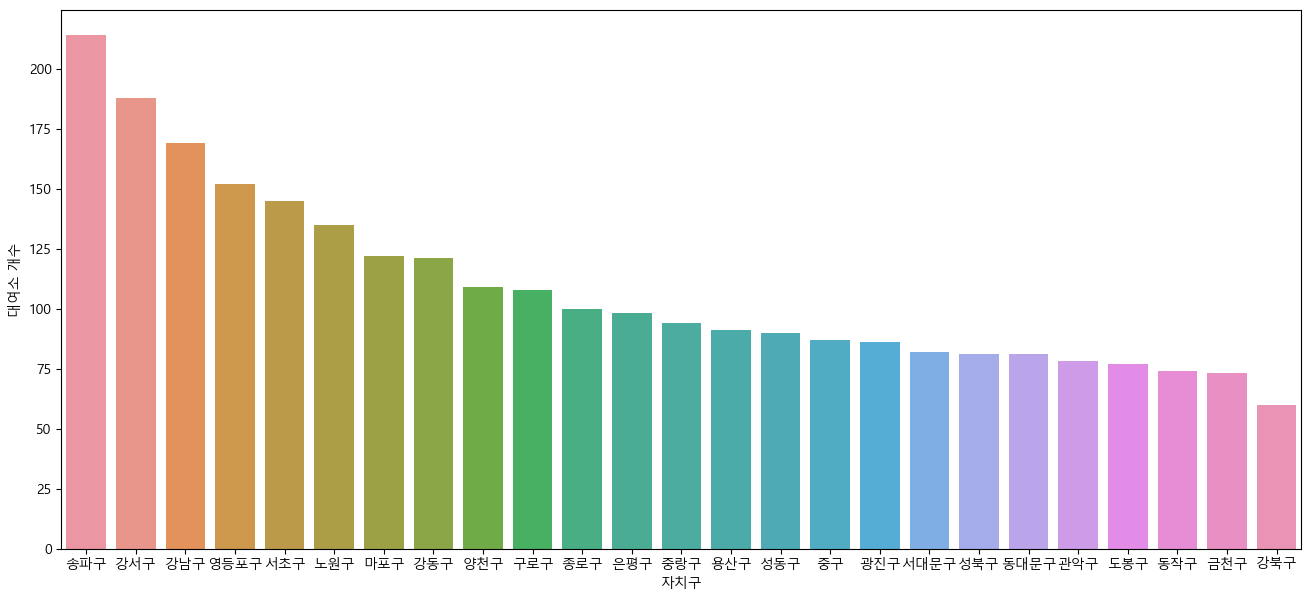

In [247]:
#시각화
plt.figure(figsize = (16, 7))
sns.barplot(data = a_area, x = '자치구', y = '대여소 개수')
plt.show()